# <center>Sales Forecasting for PharmaSolution's 1,115 Stores in Nigeria
</center>


PharmaSolution, a leading chain of drug stores with over 3,000 outlets across 19 states in Nigeria, aims to enhance its sales prediction capabilities. Accurate sales forecasting is crucial for effective inventory management, resource allocation, and store operations planning. However, the current sales prediction process varies in accuracy across different stores, as it relies on individual managers' assessments and is influenced by various factors, including promotions, competition, holidays, seasonality, and store-specific attributes.

**Objective:**

The primary objective of this project is to develop a robust and accurate sales forecasting model for PharmaSolution drug stores in Nigeria. This model will empower store managers with data-driven insights to make informed decisions and optimize their operations.

**Key Steps to Achieve the Objective:**


- **Exploratory Data Analysis (EDA) and Data Visualization:**
   - Conduct EDA to gain insights into the dataset's characteristics.
   - Visualize data distributions, correlations, trends, and seasonality.
   - Identify patterns that can aid in sales forecasting.

- **Feature Engineering:**
   - Create additional features to improve the model's predictive power.

- **Pipeline for Data Preprocessing and Model Training:**
   - Construct a robust data preprocessing pipeline using ColumnTransformer and Pipeline from scikit-learn.
   - Include components such as imputation for handling missing data, encoding techniques for categorical variables, and scaling for numeric features.
   - Prepare the data for model training by chaining all preprocessing steps and incorporating the chosen estimator.

- **Data Splitting:**
   - Split the dataset into a validation set (40%), a test set (20%), and the remaining portion as the training set, using a random state of 42.

- **Model Training and Validation:**
   - Train the sales forecasting model on the training data using Decision Tree and Random Forest algorithms.
   - Validate the model's performance on the test data.

- **Model Evaluation:**
   - Evaluate the model's performance using the following metrics for both Decision Tree and Random Forest:
     a) RMSE (Root Mean Square Error) score
     b) R2-score (Coefficient of Determination)

- **Hyperparameter Tuning:**
   - Utilize GridSearchCV with 3-fold cross-validation to tune the model's hyperparameters.

**Expected Outcomes:**
By the end of this project, we aim to deliver a reliable and well-performing sales forecasting model for PharmaSolution stores in Nigeria. This model will provide store managers with accurate predictions of daily sales, allowing for improved decision-making and operational efficiency.

**Success Criteria:**
The project will be considered a success if the developed model achieves a high level of accuracy in sales forecasting, as demonstrated by low RMSE scores and high R2-scores. The insights from EDA and correlation analysis should also provide valuable information for decision-makers.



## Import Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import datetime
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Read in the dataset

In [2]:
df_train = pd.read_csv('train.csv')
df_store = pd.read_csv('store.csv')

In [3]:
## Merge both datasets on 'Store'
df  = df_train.merge(df_store, on='Store', how='left')
print('Dataset Shape: ', df.shape)
df.head()

Dataset Shape:  (1017209, 18)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


Our dataset contains 1017209 samples and 18 features including the target feature 'Store'. 

## Features Description

The dataset for the PharmaSolution sales forecasting project includes the following features:

1. **ID:** An identifier representing a unique combination of Store and Date within the test set.

2. **Date:** The date of purchase for which sales data is recorded.

3. **Store:** A unique identifier for each store.

4. **Sales:** The total turnover (revenue) for a given day at a particular store.

5. **Customers:** The number of customers who visited the store on a given day.

6. **Open:** An indicator showing whether the store was open (1) or closed (0) on a particular day.

7. **StateHoliday:** Indicates if it's a state holiday. Values include 'a' for public holiday, 'b' for Easter holiday, 'c' for Christmas, and '0' for none.

8. **SchoolHoliday:** Indicates whether the store was affected by the closure of public schools on that day.

9. **StoreType:** Differentiates between four different store models (a, b, c, d).

10. **Assortment:** Describes the assortment level in the store, with values 'a' for basic, 'b' for extra, and 'c' for extended.

11. **CompetitionDistance:** The distance in meters to the nearest competitor store.

12. **CompetitionOpenSince[Month / Year]:** Gives an approximate time (month/year) when the nearest competitor store opened.

13. **Promo:** Indicates whether a store is running a promo on a specific day (1 for yes, 0 for no).

14. **Promo2:** A binary indicator (0 or 1) showing if a store is participating in a consecutive promotion.

15. **Promo2Since[Week / Year]:** Describes the year and calendar week when the store started participating in Promo2.

16. **PromoInterval:** Describes the consecutive intervals for Promo2, indicating the months when the promotion is active for a store.

These features will be used to build and train the sales forecasting model, providing insights into the factors that influence daily sales at PharmaSolution stores in Nigeria.


--- 

# <center>Exploratory Data Analysis</center>

In [4]:
# Observe Data Better

observe_data = pd.DataFrame(columns = ['variable', 'NaN', 'unique', 'nunique', 'dtype'])

for i, col in enumerate(df.columns):
    observe_data.loc[i] = [col, df[col].isna().sum(), df[col].unique(), df[col].nunique(), df[col].dtypes]
    feats_df = observe_data
feats_df

,variable,NaN,unique,nunique,dtype
0,Store,0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1115,int64
1,DayOfWeek,0,"[5, 4, 3, 2, 1, 7, 6]",7,int64
2,Date,0,"[2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...",942,object
3,Sales,0,"[5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...",21734,int64
4,Customers,0,"[555, 625, 821, 1498, 559, 589, 1414, 833, 687...",4086,int64
5,Open,0,"[1, 0]",2,int64
6,Promo,0,"[1, 0]",2,int64
7,StateHoliday,0,"[0, a, b, c, 0]",5,object
8,SchoolHoliday,0,"[1, 0]",2,int64
9,StoreType,0,"[c, a, d, b]",4,object


In [5]:
df2 = df.copy()

# Replace both occurrences of "0" with "None"
df2['StateHoliday'] = df2['StateHoliday'].replace('0', 'None').replace(0, 'None')


We replaced "0" with "None" in the `StateHoliday` column to ensure consistency and clarity in the representation of non-holiday days. This change helps to distinguish between actual state holidays ("a," "b," and "c") and regular non-holiday days.

In [6]:
## drop columns with very high missing values
df2 = df2.drop(['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1)

The decision to drop features with a high percentage of missing values, approximately 50%, was made to maintain data integrity and simplify the dataset for analysis. This choice is based on the understanding that retaining these features and imputing a substantial amount of missing data may introduce bias and compromise the analysis. By removing these features, the dataset becomes more manageable, and the focus is placed on key information. This decision ensures consistency in the data preprocessing pipeline, though it remains open to reconsideration based on further analysis or domain knowledge.






In [7]:
#a custom function to check if there are duplicates in our dataset and keep just 1 of the duplicates

def remove_duplicates(data):
    print('Before dropping duplicates: ', data.shape[0])
    data.drop_duplicates(keep = 'first', inplace=True)
    print('After dropping duplicates: ', data.shape[0]) 
    

remove_duplicates(df2)

Before dropping duplicates:  1017209
After dropping duplicates:  1017209


There are no duplicate samples in the dataset.

---

### Descriptive Stats Of Dataset

In [8]:
## Descriptive stats of numerical features
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.085652,7715.323700,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.222866,3.211832,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.690228,5.992644,1900.0,2006.0,2010.0,2013.0,2015.0


In [9]:
## descriptive stats of categorical features
df2.describe(include='O').T 

,count,unique,top,freq
Date,1017209,942,2015-07-31,1115
StateHoliday,1017209,4,None,986159
StoreType,1017209,4,a,551627
Assortment,1017209,3,a,537445


--- 

### Distribution of Target (Sales)

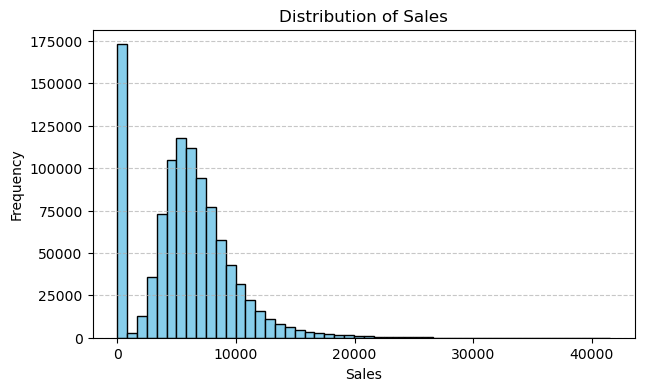

In [10]:
## plot the distribution of sales
plt.figure(figsize=(7, 4))
plt.hist(df2['Sales'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The sales distribution plot indicates that the majority of daily sales values are below 10,000, with a prominent occurrence of zero sales days (172,871 counts). Sales values exceeding 20,000 are infrequent and considered outliers but we wouldn't tampering with them because it is very possible that there days of very high sales than normal. Understanding the factors behind zero sales days and investigating the causes of high-value sales outliers is crucial for business analysis and decision-making.

### Distribution of Sales by Store Type

In [11]:
##descriptive stats of sales for each store type
store_type_stats = df2.groupby('StoreType')['Sales'].describe()
store_type_stats

,count,mean,std,min,25%,50%,75%,max
StoreType,,,,,,,,
a,551627.0,5738.179710,3964.028134,0.0,3508.0,5618.0,7860.00,41551.0
b,15830.0,10058.837334,5280.525506,0.0,6227.0,9025.5,13082.75,38722.0
c,136840.0,5723.629246,3721.700886,0.0,3789.0,5766.0,7849.00,31448.0
d,312912.0,5641.819243,3473.393781,0.0,3986.0,5826.0,7691.00,38037.0


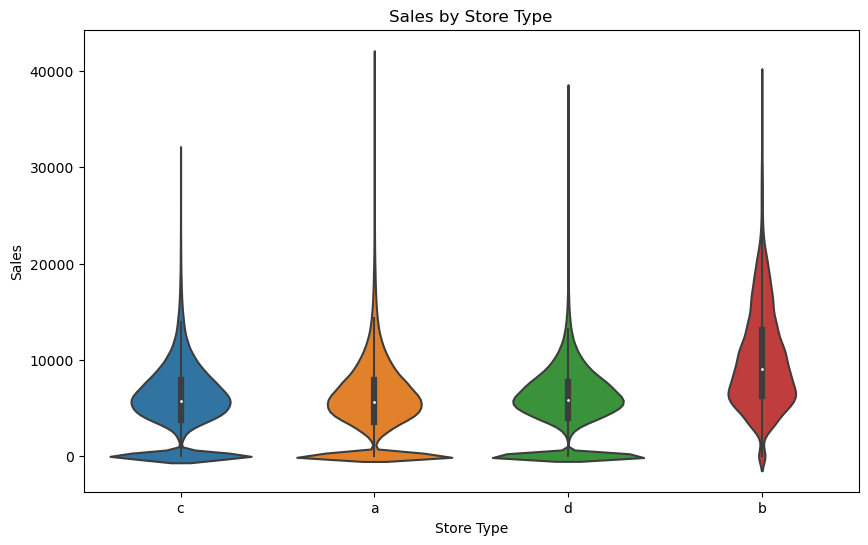

In [12]:
# Create a violin plot to visualize the distribution of sales for each store type
plt.figure(figsize=(10, 6))
sns.violinplot(x='StoreType', y='Sales', data=df2)
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

- Store Type 'b' has the highest average sales, followed by Store Type 'a'.
- Store Type 'c' and 'd' have slightly lower mean sales values but still exhibit a similar range.
- All store types have a substantial number of zero sales days, as indicated by a minimum value of $0.
- Store Type 'b' demonstrates the highest variation in sales, with a wide spread between the   quartiles.
- Store Type 'a,' 'c,' and 'd' have relatively similar interquartile ranges, suggesting less variability in sales within these store types.


These inferences provide valuable insights into the distribution of sales for different store types, helping to understand their respective sales characteristics and variances.

### Average Sales by StoreType

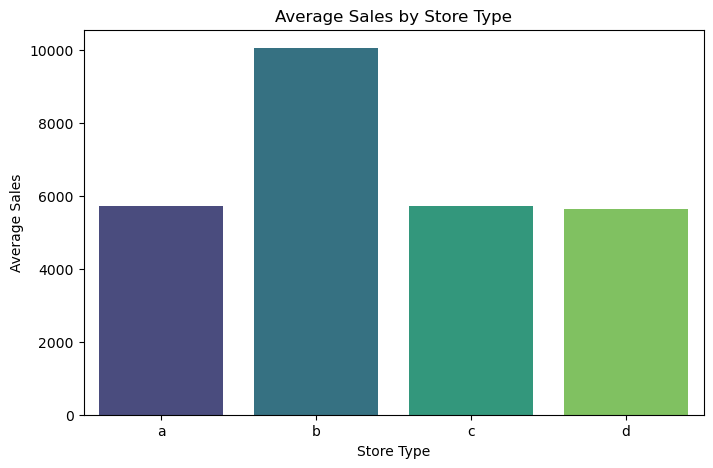

In [13]:
# Group the data by 'StoreType' and calculate the average sales for each group
average_sales_by_store_type = df2.groupby('StoreType')['Sales'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='StoreType', y='Sales', data=average_sales_by_store_type, palette='viridis')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()


- Store Type 'b' demonstrates the highest average daily sales among the four store types, with an approximate value of 10,058.84.

- Store Types 'a,' 'c,' and 'd' have relatively similar average sales values, with 'a' at approximately 5,738.18, 'c' at about 5,723.63, and 'd' with an average of 5,641.82. These store types perform at a comparable sales level on average.

### Customers VS Sales

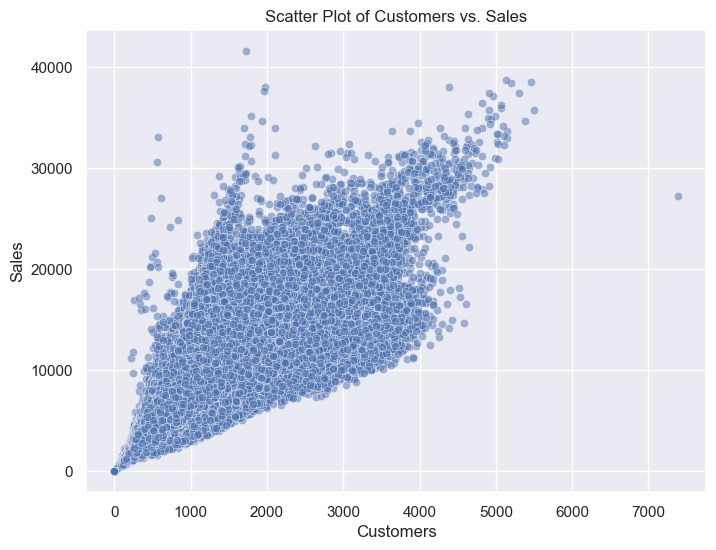

In [14]:
# Set the style and palette
sns.set(style="darkgrid")

#Plot scatter plot for customer vs sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df2, x='Customers', y='Sales', alpha=0.5)
plt.title('Scatter Plot of Customers vs. Sales')
#plt.grid(True)
plt.show()


The scatter plot of "Customers" vs. "Sales" reveals a strong and positive linear correlation between the number of customers and daily sales for the stores in the dataset. As the number of customers increases, there is a corresponding increase in daily sales revenue. This correlation emphasizes the significance of attracting more customers to boost sales, making it a fundamental insight for businesses in the retail industry.

### Average Sales by State Holiday

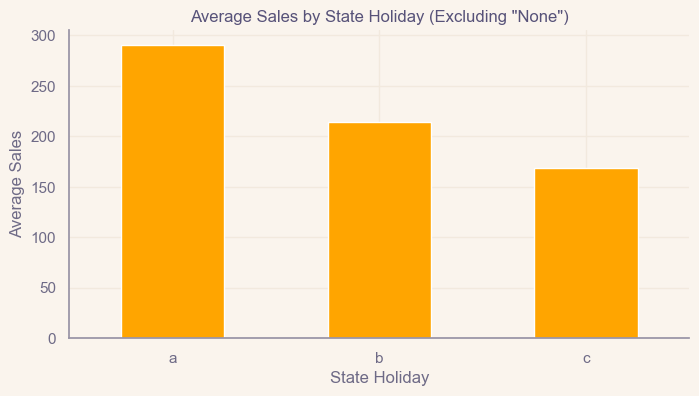

In [15]:
# Average sales by stateholiday
avg_sales_by_stateholiday = df2.groupby('StateHoliday')['Sales'].agg('mean')

# Filter out the 'None' category
stateholiday_avg_sales_filtered = avg_sales_by_stateholiday[avg_sales_by_stateholiday.index != 'None']

# Plot a bar chart
with plt.style.context('rose-pine-dawn'):
    plt.figure(figsize=(8,4))
    stateholiday_avg_sales_filtered.plot(kind='bar', color='orange')
    plt.title('Average Sales by State Holiday (Excluding "None")')
    plt.xlabel('State Holiday')
    plt.ylabel('Average Sales')
    plt.xticks(rotation=0)

- `a (Public Holiday)`: The average sales on public holidays (category "a") are the highest among the state holidays, with an average of approximately 290.74 sales. This indicates that stores tend to experience higher sales on public holidays compared to other state holidays.

- `b (Easter Holiday)`: The average sales on Easter holidays (category "b") are slightly lower than public holidays, with an average of approximately 214.31 sales. While lower than public holidays, Easter holidays still lead to higher sales compared to Christmas holidays.

- `c (Christmas)`: Christmas holidays (category "c") have the lowest average sales among the state holidays, with an average of approximately 168.73 sales. This suggests that stores may experience a decrease in sales during the Christmas holiday period, possibly due to store closures and reduced shopping activity on Christmas.

In summary, the analysis indicates that state holidays have varying effects on store sales, with public holidays resulting in the highest average sales, followed by Easter holidays, and Christmas holidays having the least impact on sales.

### Correlation Matrix

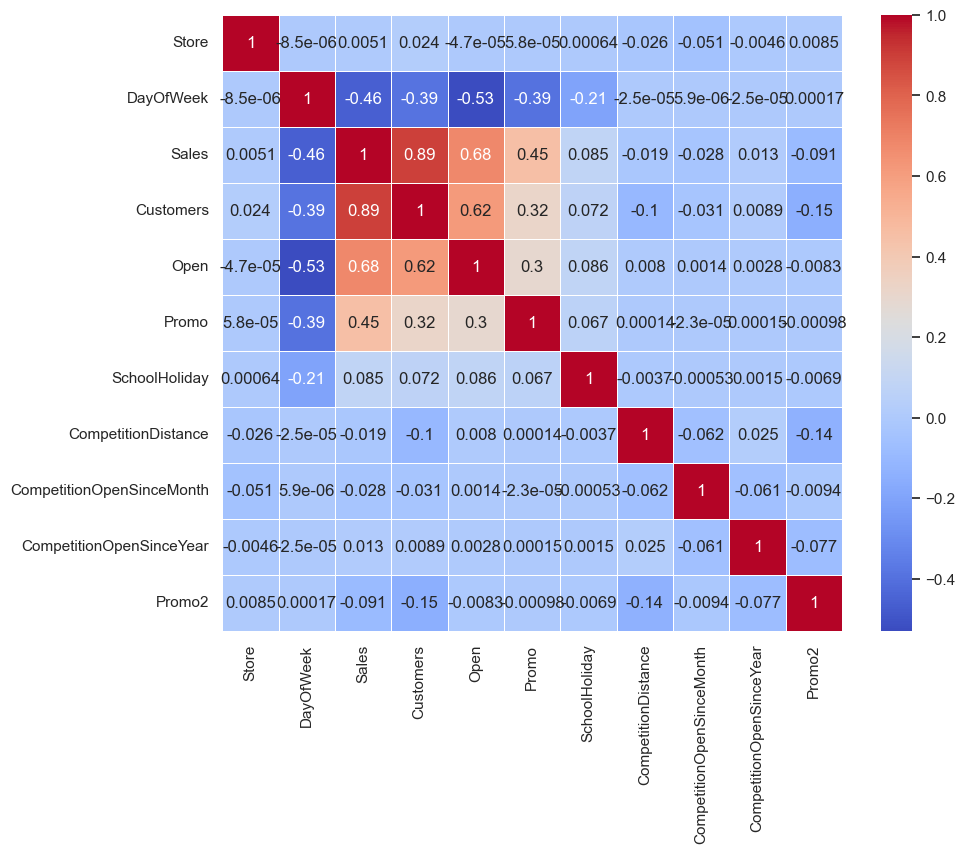

In [16]:
# Calculate the correlation matrix
correlation_matrix = df2.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


The correlation matrix provides insights into the relationships between various numerical features in the dataset. Here are key observations from the correlation matrix:

- `Sales and Customers (0.895)`: The most notable positive correlation in the dataset is between "Sales" and "Customers" with a strong correlation coefficient of approximately 0.895. This indicates that there is a significant positive relationship between the number of customers and the daily sales. As the number of customers increases, daily sales tend to increase as well. 

- `Sales and Promo (0.452)`: There is a moderate positive correlation of around 0.452 between "Sales" and "Promo." This suggests that the presence of a promotion in a store is positively correlated with higher sales, although the correlation is not as strong as that between sales and customers.

- `Open and Promo (-0.295)`: The "Open" and "Promo" features exhibit a moderate negative correlation of approximately -0.295. This implies that stores that are open are less likely to run promotions, and stores that are closed are more likely to have promotions.

- `DayOfWeek and Open (-0.529)`: The "DayOfWeek" and "Open" features have a strong negative correlation of around -0.529. This suggests that stores are more likely to be closed on certain days of the week (e.g., weekends) and open on others, which is reflected in this negative correlation.


- `Promo and Promo2 (-0.000983)`: "Promo" and "Promo2" with a correlation of -0.000983 is very close to zero, indicating a very weak or negligible correlation between these two variables. This means that there is no significant negative correlation between "Promo" and "Promo2.

In summary, the correlation matrix helps in identifying significant relationships between various features in the dataset. Notably, there is a strong positive correlation between "Sales" and "Customers," which suggests that the number of customers has a substantial impact on daily sales. Additionally, the matrix highlights relationships between store opening, promotions, and competition-related features. Understanding these correlations is valuable for making data-driven decisions and developing predictive models.

In [17]:
## drop customers to avoid multicollinearity.
#df3 = df2.drop('Customers', axis=1)

--- 

## Feature Engineering

In [18]:
df3 = df2.copy()

# Extract 'month' from the Data and add as a new feature
df3['Month'] = pd.to_datetime(df3['Date']).dt.month

# Any Holiday
df3['AnyHoliday'] = (df3['StateHoliday'] != 'None') | (df3['SchoolHoliday']== 1)
df3['AnyHoliday'] = df3['AnyHoliday'].astype(int)

# Calculate the average sales for each store
store_average_sales = df3.groupby('Store')['Sales'].mean().reset_index()
store_average_sales.rename(columns={'Sales': 'AverageSalesByStore'}, inplace=True)
# Merge the average sales back into the original DataFrame
df3 = df3.merge(store_average_sales, on='Store', how='left')

In [19]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Month,AnyHoliday,AverageSalesByStore
0,1,5,2015-07-31,5263,555,1,1,None,1,c,a,1270.0,9.0,2008.0,0,7,1,3945.704883
1,2,5,2015-07-31,6064,625,1,1,None,1,a,a,570.0,11.0,2007.0,1,7,1,4122.991507
2,3,5,2015-07-31,8314,821,1,1,None,1,a,a,14130.0,12.0,2006.0,1,7,1,5741.253715
3,4,5,2015-07-31,13995,1498,1,1,None,1,c,c,620.0,9.0,2009.0,0,7,1,8021.769639
4,5,5,2015-07-31,4822,559,1,1,None,1,a,a,29910.0,4.0,2015.0,0,7,1,3867.110403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,1,1,4342.968153
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,1,1,8465.280255
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,1,1,5516.180467
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,1,1,17200.196391


In [20]:
## drop the 'Date' column as we wouldn't be needing it anymore
df3.drop('Date', axis=1, inplace=True)

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  object 
 7   SchoolHoliday              1017209 non-null  int64  
 8   StoreType                  1017209 non-null  object 
 9   Assortment                 1017209 non-null  object 
 10  CompetitionDistance        1014567 non-null  float64
 11  CompetitionOpenSinceMonth  693861 non-null   float64
 12  CompetitionOpenSinceYear   693861 non-null   float64
 13  Promo2      

## Pipeline

In [22]:
## Select numeric features from categorical features

num_cols = ['Store', 'DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Month', 'AnyHoliday', 'AverageSalesByStore', 'Customers']

cat_cols = ['StateHoliday', 'StoreType', 'Assortment']

In [23]:
### COLUMN_TRANSFORMER ###

# Preprocess the numerical features
numerical_processor = Pipeline([
    ('numeric_imp', SimpleImputer(strategy='median')),
    ('numeric_scaler', MinMaxScaler())
])

# Preprocess the categorical features
categorical_processor = Pipeline([
    ('categorical_imp', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('categoric_encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Create a ColumnTransformer to apply preprocessing to different feature types
data_preprocessor = ColumnTransformer([
    ('num_preprocessor', numerical_processor, num_cols),  # num_cols is a list of numerical columns
    ('cat_preprocessor', categorical_processor, cat_cols)  # cat_cols is a list of categorical columns
])


### PIPELINE ###

# Create a pipeline for Random Forest regression
rf_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('rf', RandomForestRegressor())
])

# Create a pipeline for Decision Tree regression
dt_pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('df', DecisionTreeRegressor())
])


In [24]:
# Visualize the pipeline
from sklearn import set_config
set_config(display='diagram')
rf_pipeline


Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  Pipeline(steps=[('numeric_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numeric_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Store', 'DayOfWeek', 'Open',
                                                   'Promo', 'SchoolHoliday',
                                                   'CompetitionDistance',
                                                   'CompetitionOpenSinceMonth',
                                                   'CompetitionOpenSinceYear',
                                                   'Promo2', 'Month',
                                                   'AnyHoliday',
                                                   'AverageSalesByStore',
                                                   'Customers']),
                                                 ('cat_preprocessor',
                                                  Pipeline(steps=[('categorical_imp',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('categoric_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['StateHoliday', 'StoreType',
                                                   'Assortment'])])),
                ('rf', RandomForestRegressor())])

In [25]:
dt_pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('num_preprocessor',
                                                  Pipeline(steps=[('numeric_imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numeric_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Store', 'DayOfWeek', 'Open',
                                                   'Promo', 'SchoolHoliday',
                                                   'CompetitionDistance',
                                                   'CompetitionOpenSinceMonth',
                                                   'CompetitionOpenSinceYear',
                                                   'Promo2', 'Month',
                                                   'AnyHoliday',
                                                   'AverageSalesByStore',
                                                   'Customers']),
                                                 ('cat_preprocessor',
                                                  Pipeline(steps=[('categorical_imp',
                                                                   SimpleImputer(fill_value='unknown',
                                                                                 strategy='constant')),
                                                                  ('categoric_encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['StateHoliday', 'StoreType',
                                                   'Assortment'])])),
                ('df', DecisionTreeRegressor())])

## Model Training, Evaluating and Tuning

In [26]:
X = df3.drop('Sales', axis=1)
y= np.log1p(df3['Sales'])

In [27]:
## split the dataset into train, validation and test data

# First, split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Next, split the training set into training and validation sets (50% train, 50% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

In [28]:
print('X_train Shape: {}'.format(X_train.shape))
print('Y_train Shape: {}'.format(y_train.shape))
print('X_val Shape: {}'.format(X_val.shape))
print('Y_val Shape: {}'.format(y_val.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('Y_test Shape: {}'.format(y_test.shape))

X_train Shape: (406883, 16)
Y_train Shape: (406883,)
X_val Shape: (406884, 16)
Y_val Shape: (406884,)
X_test Shape: (203442, 16)
Y_test Shape: (203442,)


## Train and Evaluate

In [29]:
## creating a custom function to train and evaluate the performance of our model using 'RMSE', 'R2-score'

def evaluate(train_x, train_y, val_x, val_y, test_x, test_y, pipeline):
    pipeline.fit(train_x, train_y)
    datasets = [('Train', train_x, train_y), ('Validation', val_x, val_y), ('Test', test_x, test_y)]
    
    for dataset_name, X, y in datasets:
        y_pred = pipeline.predict(X)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        r2 = r2_score(y, y_pred)
        print(f'{dataset_name} RMSE: {rmse:.3f}')
        print(f'{dataset_name} R2-score: {r2:.3f}')
        print('------------------------------------')


## DecisionTree

In [30]:
## Evalute the model with the custom evaluation function created above
evaluate(X_train, y_train,X_val, y_val, X_test, y_test, dt_pipeline)

Train RMSE: 0.004
Train R2-score: 1.000
------------------------------------
Validation RMSE: 0.088
Validation R2-score: 0.999
------------------------------------
Test RMSE: 0.089
Test R2-score: 0.999
------------------------------------


### Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
dt_param_grid = {
    'df__max_depth': [2,3,4],
    'df__min_samples_split': [100, 200],
    'df__min_samples_leaf': [150, 300, 450],
    'df__max_features' : [2,3,4]
}

# Create the GridSearchCV object with the specified parameters
dt_grid_search = GridSearchCV(estimator=dt_pipeline, param_grid=dt_param_grid, cv=3, 
                              scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
dt_grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
best_dt_params = dt_grid_search.best_params_
print("Best Decision Tree Hyperparameters:", best_dt_params)

# Get the best estimator
best_dt_estimator = dt_grid_search.best_estimator_

# Use the best estimator for making predictions
y_dt_test_pred = best_dt_estimator.predict(X_test)

# Calculate RMSE and R2 score with the best hyperparameters
test_dt_rmse = np.sqrt(mean_squared_error(y_test, y_dt_test_pred))
test_dt_r2 = r2_score(y_test, y_dt_test_pred)

print("Decision Tree RMSE with Best Hyperparameters:", test_dt_rmse)
print("Decision Tree R2 Score with Best Hyperparameters:", test_dt_r2)


Best Decision Tree Hyperparameters: {'df__max_depth': 4, 'df__max_features': 4, 'df__min_samples_leaf': 450, 'df__min_samples_split': 200}
Decision Tree RMSE with Best Hyperparameters: 0.4477445638271253
Decision Tree R2 Score with Best Hyperparameters: 0.9817588821629832


## Importance of each hyperparameter for DecisionTree

- `'df__max_depth'`: This hyperparameter controls the maximum depth of the decision tree. A deeper tree can capture more complex patterns in the training data but is more prone to overfitting. Smaller values can help prevent overfitting, but the model might not capture all the patterns. By testing values like 2, 3, and 4, you are exploring different tree depths.

- `'df__min_samples_split'`: This hyperparameter specifies the minimum number of samples required to split an internal node. A higher value enforces a constraint on node splitting, which can help prevent overfitting. Values like 100 and 200 represent the minimum number of samples required to split a node.

- `'df__min_samples_leaf'`: This hyperparameter sets the minimum number of samples required to be in a leaf node. Larger values can simplify the tree and reduce its complexity, reducing the risk of overfitting. Values like 150, 300, and 450 represent the minimum number of samples in a leaf.

- `'df__max_features'`: This hyperparameter controls the number of features to consider when looking for the best split. It can help reduce the model's variance and improve generalization. Values like 2, 3, and 4 represent the number of features to consider.

## RandomForest

In [32]:
## Evalute the model with the custom evaluation function created above
evaluate(X_train, y_train,X_val, y_val, X_test, y_test, rf_pipeline)

Train RMSE: 0.024
Train R2-score: 1.000
------------------------------------
Validation RMSE: 0.065
Validation R2-score: 1.000
------------------------------------
Test RMSE: 0.065
Test R2-score: 1.000
------------------------------------


In [33]:

# Define the parameter grid to search
param_grid = {
    'rf__n_estimators': [25, 50, 100],  # Number of trees in the forest
    'rf__max_depth': [2,3,4],  # Maximum depth of the tree
    'rf__min_samples_split': [50, 100, 200],  # Minimum samples required to split an internal node
    'rf__min_samples_leaf':  [150, 300, 450],  # Minimum samples required in a leaf node
}

# Create the GridSearchCV object with the specified parameters
grid_search = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, cv=3, 
                           scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best estimator
best_rf_estimator = grid_search.best_estimator_

# Use the best estimator for making predictions
y_test_pred = best_rf_estimator.predict(X_test)

# Calculate RMSE and R2 score with the best hyperparameters
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("RMSE with Best Hyperparameters:", test_rmse)
print("R2 Score with Best Hyperparameters:", test_r2)


Best Hyperparameters: {'rf__max_depth': 4, 'rf__min_samples_leaf': 300, 'rf__min_samples_split': 200, 'rf__n_estimators': 25}
RMSE with Best Hyperparameters: 0.20157811274649073
R2 Score with Best Hyperparameters: 0.9963027607470475


## Importance of each hyperparameter for RandomForest


- `'max_depth'`: This hyperparameter controls the maximum depth of the individual decision trees in the Random Forest. It limits the number of nodes and splits in each tree. A deeper tree can capture more complex relationships in the data, but it can also lead to overfitting if set too high.

- `'min_samples_split'`: It determines the minimum number of samples required to split an internal node of a decision tree. If the number of samples in a node is less than min_samples_split, the node will not be split further. This parameter helps control the tree's depth and complexity and can prevent overfitting by setting it to a higher value.

- `'min_samples_leaf'`: This hyperparameter specifies the minimum number of samples required to be in a leaf node. A smaller min_samples_leaf value can lead to more complex trees, while a larger value encourages simpler trees. It helps control overfitting by preventing small leaf nodes.

- `'max_features'`: It controls the maximum number of features to consider when looking for the best split at each node. The "auto" setting allows the algorithm to consider all features, while "sqrt" uses the square root of the total number of features, and "log2" uses the base-2 logarithm of the number of features. By limiting the number of features to consider, it can add randomness to the model, reducing overfitting.

**Which model performed better??**

The Random Forest model exhibited superior performance on the dataset, as evidenced by its lower root mean squared error (RMSE) and higher coefficient of determination (R-squared, R2) compared to the Decision Tree model.